# Business Name Insights

Performing basic exploratory data analyis on this public [kaggle dataset](https://www.kaggle.com/datasets/peopledatalabssf/free-7-million-company-dataset) to find interesting & actionable location intelligence insights exclusively from business names.

# Data Preparation

Load helper code & the raw dataset to analyize the business _name_ column & compare it to ther meta columns to validate our insights.

In [5]:
from lib.helpers import *
import glob
df = pd.concat(
    (
        pd.read_csv(file, compression='zip', header=None, sep=',')
        for file in glob.glob("data/part_*.csv.zip")
    ),
    ignore_index=True
)
df_overview(df)

,counts,%_missing,%_unique,dtype
column_name,,,,
0,720000,0.0%,100.0%,int64
1,720000,0.0%,99.61%,object
2,632309,12.18%,87.69%,object
3,460254,36.08%,0.03%,float64
4,719835,0.02%,0.02%,object
5,720000,0.0%,0.0%,object
6,534131,25.82%,5.31%,object
7,550282,23.57%,0.03%,object
8,720000,0.0%,100.0%,object


For our target business _name_ variable, there are **+7 million unique records**! We will remove unwanted columns & perform basic cleanup / populate missing values of the remaining "_meta_" columns.

In [2]:
# append split out locality column parts.
df[['city','state','nation']] = df['locality'].str.split(',', n=3, expand=True)

# remove unwanted columns
df.drop([
    'Unnamed: 0',                # unwanted dummy index
    'country',                   # redundant from locality
    'locality',                  # extra after location split
    'size range',                # redundant from total employees
    'current employee estimate', # redundant from total employees
    'linkedin url',              # redundant from domain & not needed
], axis=1, inplace=True)

# remove the few missing names for wich we cannot analyze
df.drop(df.index[df['name'].isna()], inplace=True)

# set default year.
df['year founded'].fillna(0, inplace=True)
df['year founded'] = df['year founded'].astype('int64')

When visualizing the categorical "_meta_" columns below, we see this dataset is skewed toward **english North American companies** within the **IT & Marketing** sectors.

<Axes: title={'center': 'top volume by segment (log)'}, ylabel='industry'>

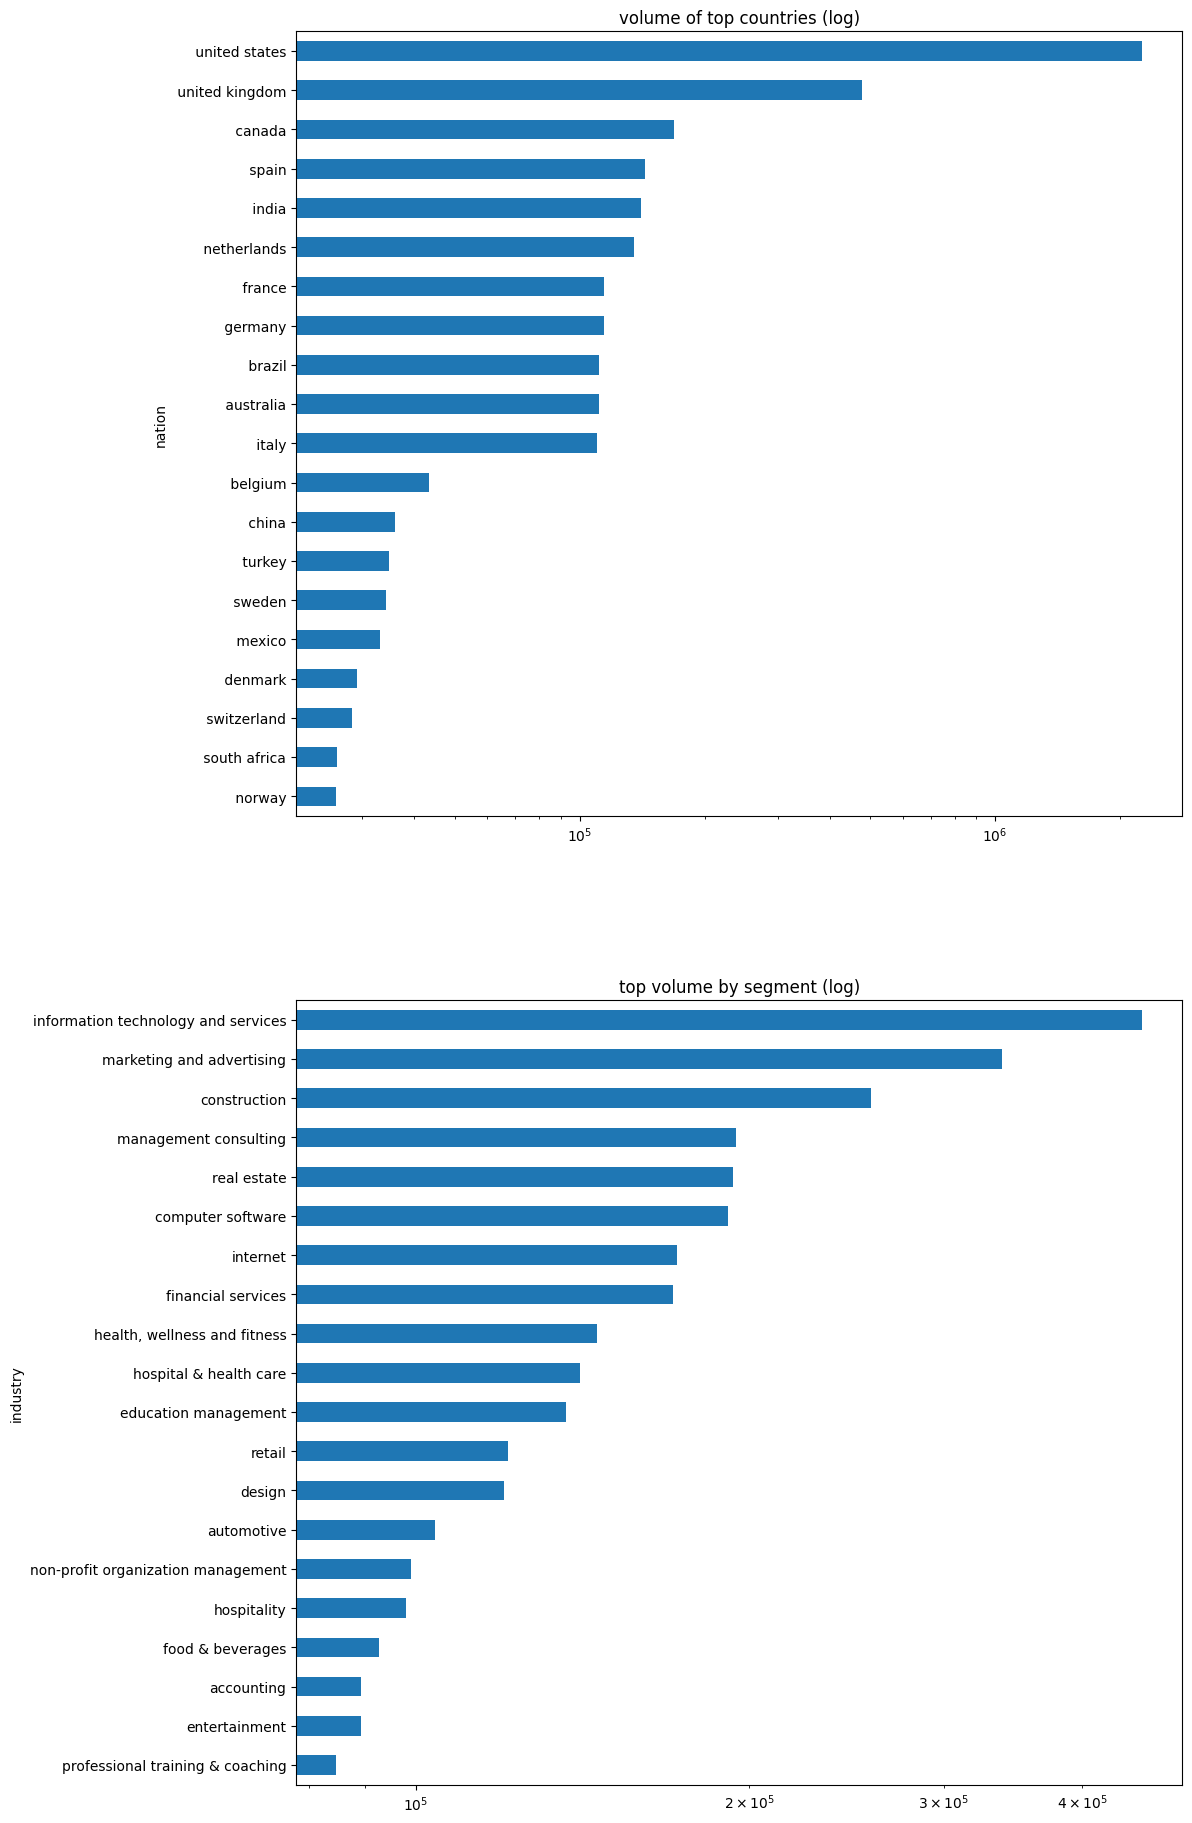

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=1)
fig.tight_layout()

# top n breakdown
df['nation'].value_counts()[:20].iloc[::-1].plot(
  kind='barh', ax=axs[0], logx=True, figsize=(10, 20),
  title="volume of top countries (log)"
)
df['industry'].value_counts()[:20].iloc[::-1].plot(
  kind='barh', ax=axs[1], logx=True, figsize=(10, 20),
  title="top volume by segment (log)"
)

Similarly, when visualizing the distribution of numeric columns we see the bulk of the dataset is represented by **newish & small businesses** with a handfull of **conglomerate or ancient companies**.

<Axes: title={'center': 'volume of employee sized companies (<100 ppl)'}, ylabel='Frequency'>

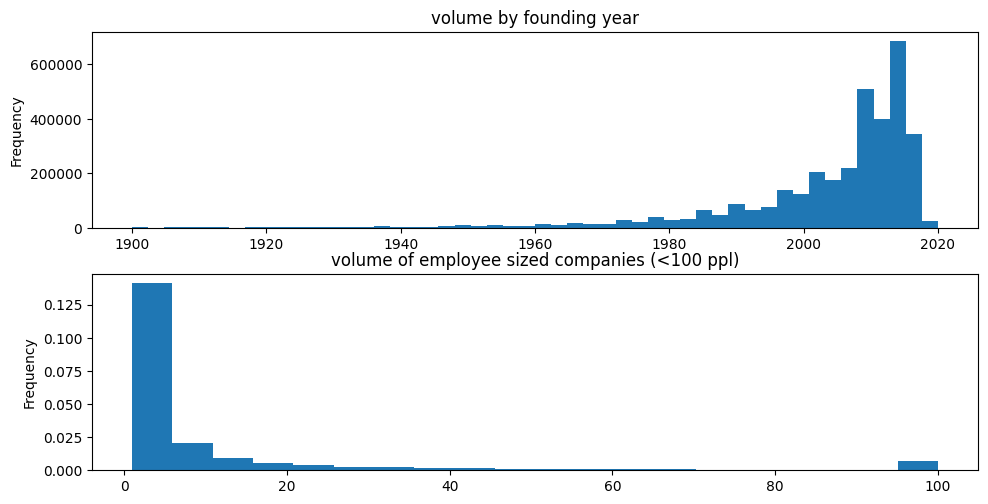

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=1)
fig.tight_layout()

# distribution of company age (excluding empty or ancient ones) 
df['year founded'].loc[
  (df['year founded'] >= 1900) & 
  (df['year founded'] <= 2020)
].plot(
  kind='hist', ax=axs[0], bins=50, figsize=(10, 5),
  title="volume by founding year"
)
# distribution of data by company size (
np.clip(df['total employee estimate'], 0, 100).plot(
  kind='hist', ax=axs[1], bins=20, density=True, figsize=(10, 5),
  title="volume of employee sized companies (<100 ppl)"
)

To speedup further analysis we random sample & show what their values look like.

In [6]:
df_rnd = df.sample(frac=0.1, random_state=42)
print(f"data points: {df_rnd.shape[0]}")
df_rnd.head(n=30)

data points: 717342


,name,domain,year founded,industry,total employee estimate,city,state,nation
1527030,the harver company,harverco.com,1960,construction,4,lake oswego,oregon,united states
4529679,mendon fire department,mendonfd.org,0,real estate,1,mendon,new york,united states
2386813,asint s.r.l.,asint.it,1996,management consulting,4,massa,tuscany,italy
4187200,powers stained glass,powersstainedglass.com,1983,arts and crafts,1,scottsdale,arizona,united states
324128,marin bikes,marinbikes.com,1986,sporting goods,83,novato,california,united states
1195955,ramp industries,ramp.co.uk,1990,aviation & aerospace,23,yeovil,somerset,united kingdom
4236876,canibis,canibis.swiss,2017,tobacco,1,delemont,jura,switzerland
4704342,paul brown training ltd,NaN,0,professional training & coaching,1,NaN,NaN,NaN
1493645,rossborough financial services limited,rfsl.co.uk,0,financial services,8,NaN,NaN,NaN
6273386,insurance pro agencies,insuranceproagencies.com,2004,insurance,1,orland park,illinois,united states


# Research Hypothesis

### 1) Business Sector
Is the type of business reflected in its name? (ie: restaurant, shop, health care, ..)

**💡APROACH:** since busines names try to differentiate themselves from  competitors yet be quickly identifiable by new cusutomers we we can apply basic NLP techniques. Namely analyize frequency of n-grams (say 1-3) within all language translated names. The common part of names that denote the industry will become more frequent n-grams. ie: "_university of X_" "_Y bistro bar & grill_". We can benchmark the frequent terms in business names against the lableled industry (& synonymsof)


### 2) International vs Domestic
Can we determine if a company is likely local or foreign soley by its name?

**💡APROACH:** local busines names will be expressed in their regional language while international companies will leverage their branding & use the headquarter language. So we could language tag all business names & compare the most likely language against the regional languages spoken in the companies location. Those name vs country language mismatches are likely international companies while those matching are domestic. Examples:
* ``omicron  motorsport``@en is headquartered in the UK which also speaks english so deamed domestic whenever instances are seen in english speaking countries.
* Cases like ``shoppers pharmacy``@en which also have ``phramaprix``@fr as another legal name for the french part of canada will yield false positives.

Similar approach can be applied by detecting geo-terms from business names & checking if they correspond to the country, region or city to deem these domestic. ie: "Spanish National Bank" in spain would be a domestic company.


### 3) Franchise vs Mom/Pop
Can we detect which company names are franchise brands vs one-off hyperlocal businesses?

**💡APROACH:** simple frequency analyis for number of instances a POI business occurs will signal if the company is a franchise (say > 30) or a local business (say =1). This insight not possible with the dataset as there is limited repretition which does NOT correspond to store locations.

### 4) Mergers & Aquisitions
Are there signals in the names that indicate when a company was the combination of other companies?

**💡APROACH:** compile heuristics to detect the following:
* tease out corporate words like ``Inc``, ``LLC``, ``CO`` that indicate large corporations.
* detect if most parts of names exists as other business names in the dataset or if the parts sound like separate corporate names. ie: ``Dell EMC Inc`` was the merger of ``Dell Computer`` & ``EMC``.  

### 5) Brand Co-Location / Relationships
Sometimes distinct business parner up with other businesses (ie: McDonalds within Walmart, TimHortons / Shell, etc)

**💡APROACH:** 
* "McDonals within Walmart" 
* "University of Toronto at Mississauga"